In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

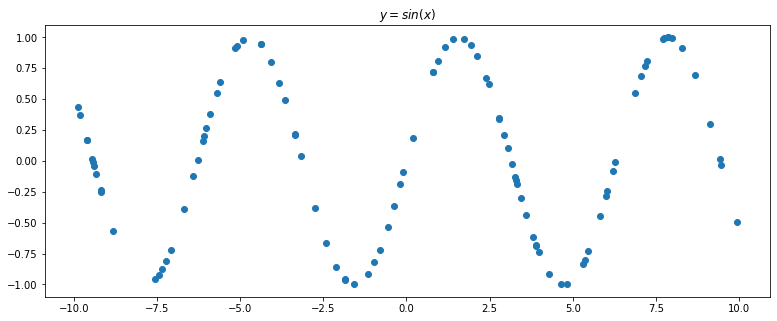

In [3]:
# training dataset 

x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

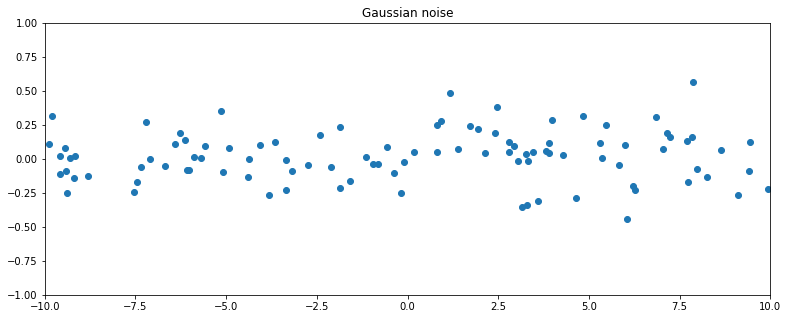

In [4]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

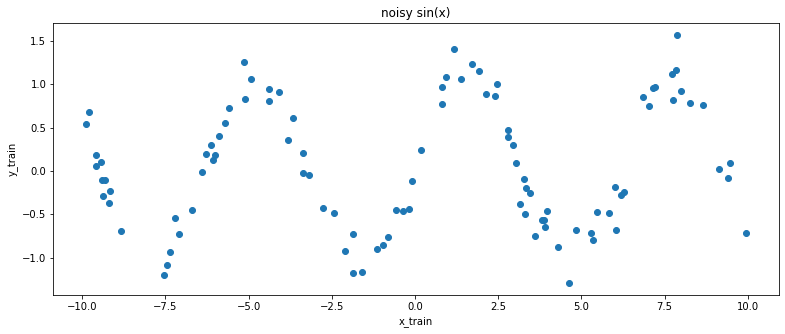

In [5]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [6]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [7]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


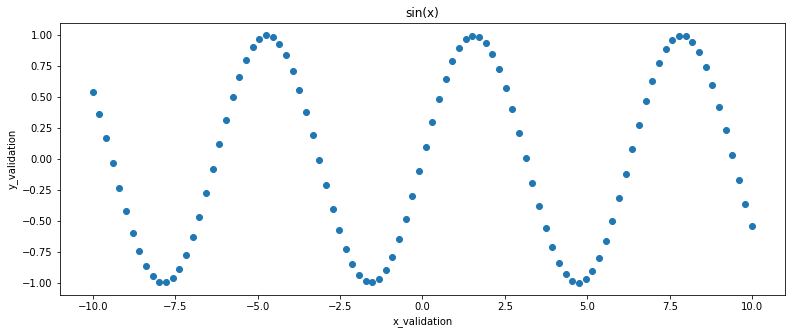

In [8]:
# validation dataset

x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [9]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [26]:
# creating neural network

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) # first layer
        self.act1 = torch.nn.Sigmoid() # activation function
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1) # second layer - answer

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(10)

In [14]:
# task: add one more fc-layer, change activation function (Tanh)

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1,n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons,1)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

n_hidden_neurons = 20
sine_net = SineNet(n_hidden_neurons)
sine_net.forward(torch.Tensor([1.]))

print(sine_net)

SineNet(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


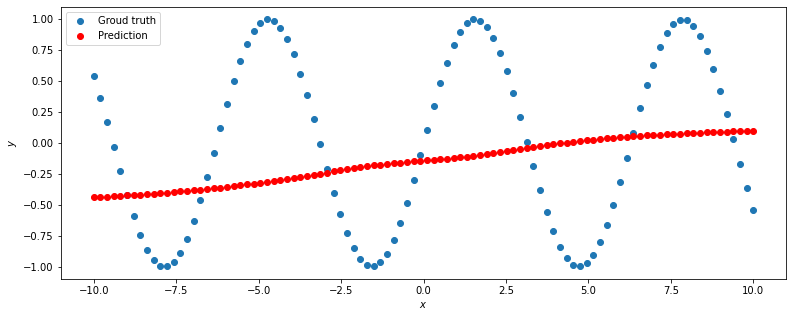

In [16]:
# prediction

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [27]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [18]:
# using MSE

def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

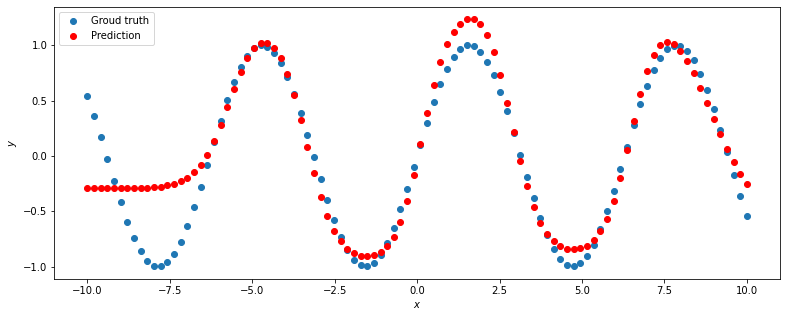

In [28]:
# training

for epoch_index in range(2000):
    optimizer.zero_grad() 

    y_pred = sine_net.forward(x_train) # count prediction
    loss_val = loss(y_pred, y_train) # count loss function

    loss_val.backward() 

    optimizer.step() # gradiend step

# predict(sine_net, x_validation, y_validation)

##Task

In [71]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [73]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1,n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons,1)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

n_hidden_neurons = 20
net = RegressionNet(n_hidden_neurons)

print(net)

RegressionNet(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


In [74]:
# dataset preparation

x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.2003e-04],
        [ 2.6802e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5003e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9806e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3339e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

In [75]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [76]:
def loss(pred, target):
    mae = torch.abs(pred - target)
    return mae.mean()

In [77]:
for epoch_index in range(2000):
    optimizer.zero_grad() 

    y_pred = net.forward(x_train) # count prediction
    loss_val = loss(y_pred, y_train) # count loss function

    loss_val.backward() 

    optimizer.step() # gradiend step

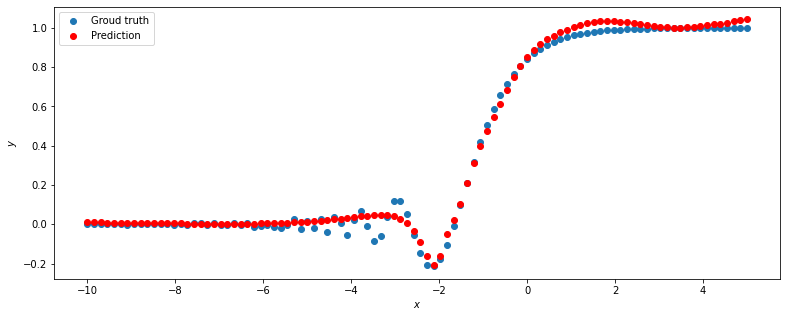

In [78]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


predict(net, x_validation, y_validation)

In [79]:
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())

0.024100156500935555
